In [ ]:
import os
import gzip
import shutil
import pandas as pd
import numpy as np

def manual_parse_data(dataset_name):
    pkl_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gistic.pkl'
    gz_file_path ='./datasets/TCGA.OV.sampleMap_Gistic2_CopyNumber_Gistic2_all_thresholded.by_genes (2).gz'#修改名字
    tsv_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gistic.tsv'
    
    # 确保.gz文件存在
    if not os.path.exists(gz_file_path):
        raise FileNotFoundError(f"File {gz_file_path} not found. Please download manually.")
    # 解压缩文件
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(tsv_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # 读取解压后的.tsv文件
    df = pd.read_csv(tsv_file_path, sep='\t')

    # 转置数据
    df_t = df.transpose()

    # 设置列名为第一行的内容
    df_t.columns = df_t.iloc[0]
    df_t = df_t.drop(df_t.index[0])

    # 保存为.pkl文件以便以后快速加载
    df_t.to_pickle(pkl_file_path)

    # 删除中间文件
    os.remove(gz_file_path)
    os.remove(tsv_file_path)

    # 将所有数据转换为数值型
    df_t = df_t.apply(pd.to_numeric)
    return df_t



# 使用手动解析函数处理数据
dataset_name = "OV"
df = manual_parse_data(dataset_name)



In [ ]:
import pandas as pd

# 读取处理后的.pkl文件
pkl_file_path = './datasets/TCGA-OV.gistic.pkl'
df = pd.read_pickle(pkl_file_path)

# 计算每一列的平均值
mean_values = df.mean()

# 对列标题及其平均值进行排序
sorted_mean_values = mean_values.sort_values(ascending=False)

# 将排序后的结果保存到新的 DataFrame
sorted_df = pd.DataFrame({
    'Column': sorted_mean_values.index,
    'Mean Value': sorted_mean_values.values
})
# 取出排名前20的列名
Top20_gene = sorted_df['Column'].head(20).tolist()

# 输出Top20的列名
print("Top 20 列名：", Top20_gene)

# 将结果保存为 CSV 文件
csv_output_path = './datasets/sorted_mean_values.csv'
sorted_df.to_csv(csv_output_path, index=False)
print(f"结果已保存到 {csv_output_path}")

Top 20 列名： ['MIR4456', 'AHRR', 'LRRC14B', 'EXOC3', 'CEP72', 'CCDC127', 'C5orf55', 'BRD9', 'SDHA', 'PDCD6', 'SLC9A3', 'TPPP', 'TRIP13', 'ZDHHC11B', 'ZDHHC11', 'PLEKHG4B', 'TERT', 'CLPTM1L', 'MIR4457', 'NKD2']
结果已保存到 ./datasets/sorted_mean_values.csv


In [ ]:
import pandas as pd


# 读取 probemap 文件
probemap_file = 'datasets/gencode.v36.annotation.gtf.gene.probemap'  # 请替换为你的 probemap 文件路径
probemap_df = pd.read_csv(probemap_file, sep='\t')

# 根据 Top20 基因名称获取 ID
Top20_id = []  # 创建新的列表以存储ID
for gene in Top20_gene:
    id = probemap_df.loc[probemap_df['gene'] == gene, 'id']
    if not id.empty:
        Top20_id.append(id.values[0])  # 将找到的ID添加到 Top_id 列表中 
    else:
        Top20_id.append(None)  # 如果没有找到ID，添加 None

# 获取对应的平均值
Top20_mean_values = mean_values[Top20_gene].values

# 创建包含基因名称、ID、平均值的 DataFrame
result_df = pd.DataFrame({
    'Gene': Top20_gene,          # 第一列为基因名称
    'ID': Top20_id,              # 第二列为对应的 ID
    'Mean Value': Top20_mean_values  # 第三列为对应的平均值
})

# 打印结果 DataFrame
print(result_df)


        Gene                  ID  Mean Value
0    MIR4456   ENSG00000264233.1    0.854474
1       AHRR  ENSG00000063438.19    0.854474
2    LRRC14B   ENSG00000185028.4    0.854474
3      EXOC3  ENSG00000180104.16    0.854474
4      CEP72   ENSG00000112877.8    0.854474
5    CCDC127   ENSG00000164366.4    0.854474
6    C5orf55   ENSG00000221990.4    0.854474
7       BRD9  ENSG00000028310.18    0.854474
8       SDHA  ENSG00000073578.17    0.854474
9      PDCD6   ENSG00000249915.8    0.854474
10    SLC9A3  ENSG00000066230.12    0.854474
11      TPPP  ENSG00000171368.12    0.854474
12    TRIP13  ENSG00000071539.14    0.854474
13  ZDHHC11B  ENSG00000206077.13    0.854474
14   ZDHHC11  ENSG00000188818.12    0.854474
15  PLEKHG4B  ENSG00000153404.14    0.854474
16      TERT  ENSG00000164362.21    0.850541
17   CLPTM1L  ENSG00000049656.14    0.849558
18   MIR4457   ENSG00000263670.1    0.848574
19      NKD2  ENSG00000145506.14    0.847591


In [14]:
#下载gdc  ABSOLUTE拷贝
import os
import gzip
import shutil
import pandas as pd
import numpy as np

def manual_parse_data(dataset_name):
    pkl_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gdc.pkl'
    gz_file_path ='./datasets/TCGA-' + dataset_name +'.gene-level_absolute.tsv.gz'
    tsv_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gdc.tsv'
    # 确保.gz文件存在
    if not os.path.exists(gz_file_path):
        raise FileNotFoundError(f"File {gz_file_path} not found. Please download manually.")
    # 解压缩文件
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(tsv_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # 读取解压后的.tsv文件
    df = pd.read_csv(tsv_file_path, sep='\t')

    # 转置数据
    df_t = df.transpose()

    # 设置列名为第一行的内容
    df_t.columns = df_t.iloc[0]
    df_t = df_t.drop(df_t.index[0])

    # 数值转换
    #df_t = np.power(2, df_t.astype(float)) - 1
    #df_t = df_t.round(4)


    # 保存为.pkl文件以便以后快速加载
    df_t.to_pickle(pkl_file_path)

    # 删除中间文件
    #os.remove(gz_file_path)
    os.remove(tsv_file_path)

    # 将所有数据转换为数值型
    df_t = df_t.apply(pd.to_numeric)
    return df_t



# 使用手动解析函数处理数据
dataset_name = "OV"#修改名字
df = manual_parse_data(dataset_name)

In [8]:
import pandas as pd

# 读取数据表
data_file = 'datasets/TCGA-OV.gdc.pkl'  # 请替换为你的数据文件路径
data = pd.read_pickle(data_file)

# 创建一个字典存储每个 Top_id 对应的平均值
average_values = {}

for gene_id in Top20_id:
    if gene_id is not None:  # 确保 ID 不为 None
        # 计算对应列的平均值
        mean_value = data[gene_id].mean()
        average_values[gene_id] = mean_value


# 将平均值添加到 DataFrame 中，命名为 'ABSOLUTE' 列
result_df['ABSOLUTE'] = result_df['ID'].map(average_values)

# 打印结果 DataFrame
print(result_df)

         Gene                  ID  Mean Value  ABSOLUTE
0       MECOM  ENSG00000085276.19    1.198618  4.388193
1        PVT1  ENSG00000249859.12    1.177893  4.576029
2      ACTRT3   ENSG00000184378.3    1.177893  4.395349
3        TERC   ENSG00000270141.3    1.177893  4.395349
4      LRRC34  ENSG00000171757.17    1.176166  4.384615
5        MYNN  ENSG00000085274.16    1.176166  4.389587
6      LRRIQ4   ENSG00000188306.6    1.170984  4.377460
7         MYC  ENSG00000136997.21    1.170984  4.590340
8      LRRC31  ENSG00000114248.10    1.170984  4.377460
9     MIR1208   ENSG00000221261.1    1.165803  4.584973
10    MIR1207   ENSG00000221176.1    1.165803  4.588551
11      SAMD7   ENSG00000187033.9    1.164076  4.366726
12      SEC62  ENSG00000008952.17    1.164076  4.366726
13  RN7SKP226   ENSG00000201782.1    1.164076  4.582437
14       PHC3  ENSG00000173889.16    1.162349  4.350626
15    MIR1205   ENSG00000221771.1    1.162349  4.581395
16     GPR160  ENSG00000173890.17    1.160622  4

In [16]:
#下载gdc  ASCAT3拷贝
import os
import gzip
import shutil
import pandas as pd
import numpy as np

def manual_parse_data(dataset_name):
    pkl_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gdc1.pkl'
    gz_file_path ='./datasets/TCGA-' + dataset_name +'.gene-level_ascat3.tsv.gz'
    tsv_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gdc1.tsv'
    # 确保.gz文件存在
    if not os.path.exists(gz_file_path):
        raise FileNotFoundError(f"File {gz_file_path} not found. Please download manually.")
    # 解压缩文件
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(tsv_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # 读取解压后的.tsv文件
    df = pd.read_csv(tsv_file_path, sep='\t')

    # 转置数据
    df_t = df.transpose()

    # 设置列名为第一行的内容
    df_t.columns = df_t.iloc[0]
    df_t = df_t.drop(df_t.index[0])

    # 数值转换
    #df_t = np.power(2, df_t.astype(float)) - 1
    #df_t = df_t.round(4)


    # 保存为.pkl文件以便以后快速加载
    df_t.to_pickle(pkl_file_path)

    # 删除中间文件
    #os.remove(gz_file_path)
    os.remove(tsv_file_path)

    # 将所有数据转换为数值型
    df_t = df_t.apply(pd.to_numeric)
    return df_t



# 使用手动解析函数处理数据
dataset_name = "OV"#修改名字
df = manual_parse_data(dataset_name)

In [9]:
import pandas as pd

# 读取数据表
data_file = 'datasets/TCGA-OV.gdc1.pkl'  # 请替换为你的数据文件路径
data = pd.read_pickle(data_file)

# 创建一个字典存储每个 Top_id 对应的平均值
average_values = {}

for gene_id in Top20_id:
    if gene_id is not None:  # 确保 ID 不为 None
        # 计算对应列的平均值
        mean_value = data[gene_id].mean()
        average_values[gene_id] = mean_value

# 将平均值添加到 DataFrame 中，命名为 'ASCAT3' 列
result_df['ASCAT3'] = result_df['ID'].map(average_values)

# 打印结果 DataFrame
print(result_df)


         Gene                  ID  Mean Value  ABSOLUTE    ASCAT3
0       MECOM  ENSG00000085276.19    1.198618  4.388193  4.994595
1        PVT1  ENSG00000249859.12    1.177893  4.576029  5.459459
2      ACTRT3   ENSG00000184378.3    1.177893  4.395349  4.963964
3        TERC   ENSG00000270141.3    1.177893  4.395349  4.963964
4      LRRC34  ENSG00000171757.17    1.176166  4.384615  4.963964
5        MYNN  ENSG00000085274.16    1.176166  4.389587  4.963964
6      LRRIQ4   ENSG00000188306.6    1.170984  4.377460  4.954955
7         MYC  ENSG00000136997.21    1.170984  4.590340  5.448649
8      LRRC31  ENSG00000114248.10    1.170984  4.377460  4.945946
9     MIR1208   ENSG00000221261.1    1.165803  4.584973  5.457658
10    MIR1207   ENSG00000221176.1    1.165803  4.588551  5.455856
11      SAMD7   ENSG00000187033.9    1.164076  4.366726  4.911712
12      SEC62  ENSG00000008952.17    1.164076  4.366726  4.911712
13  RN7SKP226   ENSG00000201782.1    1.164076  4.582437  5.454054
14       P

In [41]:
#下载表达量
import os
import gzip
import shutil
import pandas as pd
import numpy as np

def manual_parse_data(dataset_name):
    pkl_file_path = './datasets/' + 'TCGA-' + dataset_name + '.count.pkl'
    gz_file_path ='./datasets/TCGA-' + dataset_name +'.star_counts.tsv.gz'
    tsv_file_path = './datasets/' + 'TCGA-' + dataset_name + '.count.tsv'
    # 确保.gz文件存在
    if not os.path.exists(gz_file_path):
        raise FileNotFoundError(f"File {gz_file_path} not found. Please download manually.")
    # 解压缩文件
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(tsv_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # 读取解压后的.tsv文件
    df = pd.read_csv(tsv_file_path, sep='\t')

    # 转置数据
    df_t = df.transpose()

    # 设置列名为第一行的内容
    df_t.columns = df_t.iloc[0]
    df_t = df_t.drop(df_t.index[0])

    # 数值转换
    #df_t = np.power(2, df_t.astype(float)) - 1
    #df_t = df_t.round(4)


    # 保存为.pkl文件以便以后快速加载
    df_t.to_pickle(pkl_file_path)

    # 删除中间文件
    #os.remove(gz_file_path)
    os.remove(tsv_file_path)

    # 将所有数据转换为数值型
    df_t = df_t.apply(pd.to_numeric)
    return df_t



# 使用手动解析函数处理数据
dataset_name = "OV"#修改名字
df = manual_parse_data(dataset_name)

In [10]:
import pandas as pd

# 读取数据表
data_file = 'datasets/TCGA-OV.count.pkl'  # 请替换为你的数据文件路径
data = pd.read_pickle(data_file)

# 创建一个字典存储每个 Top_id 对应的平均值
average_values = {}

for gene_id in Top20_id:
    if gene_id is not None:  # 确保 ID 不为 None
        # 计算对应列的平均值
        mean_value = data[gene_id].mean()
        average_values[gene_id] = mean_value



# 将平均值添加到 DataFrame 中，命名为 'expression' 列
result_df['expression'] = result_df['ID'].map(average_values)

# 打印结果 DataFrame
print(result_df)

# 将结果保存到 CSV 文件：
result_df.to_csv('top20_genes_with_ids_and_expression_average.csv', index=False)


         Gene                  ID  Mean Value  ABSOLUTE    ASCAT3  expression
0       MECOM  ENSG00000085276.19    1.198618  4.388193  4.994595   12.712127
1        PVT1  ENSG00000249859.12    1.177893  4.576029  5.459459    9.961079
2      ACTRT3   ENSG00000184378.3    1.177893  4.395349  4.963964    7.524944
3        TERC   ENSG00000270141.3    1.177893  4.395349  4.963964    0.759914
4      LRRC34  ENSG00000171757.17    1.176166  4.384615  4.963964    6.711959
5        MYNN  ENSG00000085274.16    1.176166  4.389587  4.963964   10.512125
6      LRRIQ4   ENSG00000188306.6    1.170984  4.377460  4.954955    3.418098
7         MYC  ENSG00000136997.21    1.170984  4.590340  5.448649   12.599711
8      LRRC31  ENSG00000114248.10    1.170984  4.377460  4.945946    2.447415
9     MIR1208   ENSG00000221261.1    1.165803  4.584973  5.457658    0.136640
10    MIR1207   ENSG00000221176.1    1.165803  4.588551  5.455856    0.000000
11      SAMD7   ENSG00000187033.9    1.164076  4.366726  4.91171

## non-cell

In [1]:
import os
import gzip
import shutil
import pandas as pd
import numpy as np

def manual_parse_data(gz_file_path, dataset_name):
    pkl_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gistic.pkl'
    tsv_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gistic.tsv'

    # 确保.gz文件存在
    if not os.path.exists(gz_file_path):
        raise FileNotFoundError(f"File {gz_file_path} not found. Please download manually.")
    
    # 解压缩文件
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(tsv_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # 读取解压后的.tsv文件
    df = pd.read_csv(tsv_file_path, sep='\t')

    # 转置数据
    df_t = df.transpose()

    # 设置列名为第一行的内容
    df_t.columns = df_t.iloc[0]
    df_t = df_t.drop(df_t.index[0])

    # 保存为.pkl文件以便以后快速加载
    df_t.to_pickle(pkl_file_path)

    # 删除中间文件
    os.remove(tsv_file_path)

    # 将所有数据转换为数值型
    df_t = df_t.apply(pd.to_numeric, errors='coerce')
    return df_t

# 分别处理LUAD和LUSC两个表
gz_file_path_luad = './datasets/TCGA.LUAD.sampleMap_Gistic2_CopyNumber_Gistic2_all_thresholded.by_genes.gz'
gz_file_path_lusc = './datasets/TCGA.LUSC.sampleMap_Gistic2_CopyNumber_Gistic2_all_thresholded.by_genes.gz'

df_luad = manual_parse_data(gz_file_path_luad, "LUAD")
df_lusc = manual_parse_data(gz_file_path_lusc, "LUSC")

# 上下合并两个数据框
df_combined = pd.concat([df_luad, df_lusc], axis=0)

# 结果保存为.pkl文件
df_combined.to_pickle('./datasets/TCGA_combined_LUAD_LUSC.gistic.pkl')

print("Data processing and merging complete.")


Data processing and merging complete.


In [2]:
import pandas as pd

# 读取处理后的.pkl文件
pkl_file_path = './datasets/TCGA_combined_LUAD_LUSC.gistic.pkl'
df = pd.read_pickle(pkl_file_path)

# 计算每一列的平均值
mean_values = df.mean()

# 对列标题及其平均值进行排序
sorted_mean_values = mean_values.sort_values(ascending=False)

# 将排序后的结果保存到新的 DataFrame
sorted_df = pd.DataFrame({
    'Column': sorted_mean_values.index,
    'Mean Value': sorted_mean_values.values
})
# 取出排名前20的列名
Top20_gene = sorted_df['Column'].head(20).tolist()

# 输出Top20的列名
print("Top 20 列名：", Top20_gene)

# 将结果保存为 CSV 文件
csv_output_path = './datasets/sorted_mean_values1.csv'
sorted_df.to_csv(csv_output_path, index=False)
print(f"结果已保存到 {csv_output_path}")

Top 20 列名： ['MIR4456', 'AHRR', 'LRRC14B', 'EXOC3', 'CEP72', 'CCDC127', 'C5orf55', 'BRD9', 'SDHA', 'PDCD6', 'SLC9A3', 'TPPP', 'TRIP13', 'ZDHHC11B', 'ZDHHC11', 'PLEKHG4B', 'TERT', 'CLPTM1L', 'MIR4457', 'NKD2']
结果已保存到 ./datasets/sorted_mean_values1.csv


In [3]:
import pandas as pd


# 读取 probemap 文件
probemap_file = 'datasets/gencode.v36.annotation.gtf.gene.probemap' 
probemap_df = pd.read_csv(probemap_file, sep='\t')

# 根据 Top20 基因名称获取 ID
Top20_id = []  # 创建新的列表以存储ID
for gene in Top20_gene:
    id = probemap_df.loc[probemap_df['gene'] == gene, 'id']
    if not id.empty:
        Top20_id.append(id.values[0])  # 将找到的ID添加到 Top_id 列表中

    elif gene == 'C5orf55':
        Top20_id.append('ENSG00000221990.4')
    else:
        Top20_id.append(None)  # 如果没有找到ID，添加 None

# 获取对应的平均值
Top20_mean_values = mean_values[Top20_gene].values

# 创建包含基因名称、ID、平均值的 DataFrame
result_df = pd.DataFrame({
    'Gene': Top20_gene,          # 第一列为基因名称
    'ID': Top20_id,              # 第二列为对应的 ID
    'Mean Value': Top20_mean_values  # 第三列为对应的平均值
})

# 打印结果 DataFrame
print(result_df)


        Gene                  ID  Mean Value
0    MIR4456   ENSG00000264233.1    0.854474
1       AHRR  ENSG00000063438.19    0.854474
2    LRRC14B   ENSG00000185028.4    0.854474
3      EXOC3  ENSG00000180104.16    0.854474
4      CEP72   ENSG00000112877.8    0.854474
5    CCDC127   ENSG00000164366.4    0.854474
6    C5orf55   ENSG00000221990.4    0.854474
7       BRD9  ENSG00000028310.18    0.854474
8       SDHA  ENSG00000073578.17    0.854474
9      PDCD6   ENSG00000249915.8    0.854474
10    SLC9A3  ENSG00000066230.12    0.854474
11      TPPP  ENSG00000171368.12    0.854474
12    TRIP13  ENSG00000071539.14    0.854474
13  ZDHHC11B  ENSG00000206077.13    0.854474
14   ZDHHC11  ENSG00000188818.12    0.854474
15  PLEKHG4B  ENSG00000153404.14    0.854474
16      TERT  ENSG00000164362.21    0.850541
17   CLPTM1L  ENSG00000049656.14    0.849558
18   MIR4457   ENSG00000263670.1    0.848574
19      NKD2  ENSG00000145506.14    0.847591


In [4]:
import os
import gzip
import shutil
import pandas as pd
import numpy as np

def manual_parse_data(gz_file_path, dataset_name):
    pkl_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gdc.pkl'
    tsv_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gdc.tsv'

    # 确保.gz文件存在
    if not os.path.exists(gz_file_path):
        raise FileNotFoundError(f"File {gz_file_path} not found. Please download manually.")
    
    # 解压缩文件
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(tsv_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # 读取解压后的.tsv文件
    df = pd.read_csv(tsv_file_path, sep='\t')

    # 转置数据
    df_t = df.transpose()

    # 设置列名为第一行的内容
    df_t.columns = df_t.iloc[0]
    df_t = df_t.drop(df_t.index[0])

    # 将所有数据转换为数值型
    df_t = df_t.apply(pd.to_numeric, errors='coerce')

    # 保存为.pkl文件以便以后快速加载
    df_t.to_pickle(pkl_file_path)

    # 删除中间文件
    os.remove(tsv_file_path)

    return df_t

# 分别处理LUAD和LUSC两个表
gz_file_path_luad = './datasets/TCGA-LUAD.gene-level_absolute.tsv.gz'
gz_file_path_lusc = './datasets/TCGA-LUSC.gene-level_absolute.tsv.gz'

df_luad = manual_parse_data(gz_file_path_luad, "LUAD")
df_lusc = manual_parse_data(gz_file_path_lusc, "LUSC")

# 上下合并两个数据框
df_combined = pd.concat([df_luad, df_lusc], axis=0)

# 保存合并后的结果为.pkl文件
df_combined.to_pickle('./datasets/TCGA_combined_LUAD_LUSC.gdc.pkl')

print("Data processing and merging complete. Files saved as .pkl")


Data processing and merging complete. Files saved as .pkl


In [5]:
import pandas as pd

# 读取数据表
data_file = './datasets/TCGA_combined_LUAD_LUSC.gdc.pkl'  # 请替换为你的数据文件路径
data = pd.read_pickle(data_file)

# 创建一个字典存储每个 Top_id 对应的平均值
average_values = {}

for gene_id in Top20_id:
    if gene_id is not None:  # 确保 ID 不为 None
        # 计算对应列的平均值
        mean_value = data[gene_id].mean()
        average_values[gene_id] = mean_value


# 将平均值添加到 DataFrame 中，命名为 'ABSOLUTE' 列
result_df['ABSOLUTE'] = result_df['ID'].map(average_values)

# 打印结果 DataFrame
print(result_df)

        Gene                  ID  Mean Value  ABSOLUTE
0    MIR4456   ENSG00000264233.1    0.854474  3.865672
1       AHRR  ENSG00000063438.19    0.854474  3.871642
2    LRRC14B   ENSG00000185028.4    0.854474  3.871642
3      EXOC3  ENSG00000180104.16    0.854474  3.871642
4      CEP72   ENSG00000112877.8    0.854474  3.862687
5    CCDC127   ENSG00000164366.4    0.854474  3.871642
6    C5orf55   ENSG00000221990.4    0.854474  3.871642
7       BRD9  ENSG00000028310.18    0.854474  3.931343
8       SDHA  ENSG00000073578.17    0.854474  3.871642
9      PDCD6   ENSG00000249915.8    0.854474  3.871642
10    SLC9A3  ENSG00000066230.12    0.854474  3.871642
11      TPPP  ENSG00000171368.12    0.854474  3.868657
12    TRIP13  ENSG00000071539.14    0.854474  4.029851
13  ZDHHC11B  ENSG00000206077.13    0.854474  3.804878
14   ZDHHC11  ENSG00000188818.12    0.854474  3.909938
15  PLEKHG4B  ENSG00000153404.14    0.854474  3.862687
16      TERT  ENSG00000164362.21    0.850541  4.038806
17   CLPTM

In [6]:
import os
import gzip
import shutil
import pandas as pd
import numpy as np

def manual_parse_data(gz_file_path, dataset_name):
    pkl_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gdc.pkl'
    tsv_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gdc.tsv'

    # 确保.gz文件存在
    if not os.path.exists(gz_file_path):
        raise FileNotFoundError(f"File {gz_file_path} not found. Please download manually.")
    
    # 解压缩文件
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(tsv_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # 读取解压后的.tsv文件
    df = pd.read_csv(tsv_file_path, sep='\t')

    # 转置数据
    df_t = df.transpose()

    # 设置列名为第一行的内容
    df_t.columns = df_t.iloc[0]
    df_t = df_t.drop(df_t.index[0])

    # 将所有数据转换为数值型
    df_t = df_t.apply(pd.to_numeric, errors='coerce')

    # 保存为.pkl文件以便以后快速加载
    df_t.to_pickle(pkl_file_path)

    # 删除中间文件
    os.remove(tsv_file_path)

    return df_t

# 分别处理LUAD和LUSC两个表
gz_file_path_luad = './datasets/TCGA-LUAD.gene-level_ascat3.tsv.gz'
gz_file_path_lusc = './datasets/TCGA-LUSC.gene-level_ascat3.tsv.gz'

df_luad = manual_parse_data(gz_file_path_luad, "LUAD")
df_lusc = manual_parse_data(gz_file_path_lusc, "LUSC")

# 上下合并两个数据框
df_combined = pd.concat([df_luad, df_lusc], axis=0)

# 保存合并后的结果为.pkl文件
df_combined.to_pickle('./datasets/TCGA_combined_LUAD_LUSC1.gdc.pkl')

print("Data processing and merging complete. Files saved as .pkl")


Data processing and merging complete. Files saved as .pkl


In [7]:
import pandas as pd

# 读取数据表
data_file = './datasets/TCGA_combined_LUAD_LUSC1.gdc.pkl'  # 请替换为你的数据文件路径
data = pd.read_pickle(data_file)

# 创建一个字典存储每个 Top_id 对应的平均值
average_values = {}

for gene_id in Top20_id:
    if gene_id is not None:  # 确保 ID 不为 None
        # 计算对应列的平均值
        mean_value = data[gene_id].mean()
        average_values[gene_id] = mean_value

# 将平均值添加到 DataFrame 中，命名为 'ASCAT3' 列
result_df['ASCAT3'] = result_df['ID'].map(average_values)

# 打印结果 DataFrame
print(result_df)

        Gene                  ID  Mean Value  ABSOLUTE    ASCAT3
0    MIR4456   ENSG00000264233.1    0.854474  3.865672  4.698892
1       AHRR  ENSG00000063438.19    0.854474  3.871642  4.696878
2    LRRC14B   ENSG00000185028.4    0.854474  3.871642  4.685801
3      EXOC3  ENSG00000180104.16    0.854474  3.871642  4.698892
4      CEP72   ENSG00000112877.8    0.854474  3.862687  4.697885
5    CCDC127   ENSG00000164366.4    0.854474  3.871642  4.685801
6    C5orf55   ENSG00000221990.4    0.854474  3.871642  4.698892
7       BRD9  ENSG00000028310.18    0.854474  3.931343  4.733132
8       SDHA  ENSG00000073578.17    0.854474  3.871642  4.688822
9      PDCD6   ENSG00000249915.8    0.854474  3.871642  4.692850
10    SLC9A3  ENSG00000066230.12    0.854474  3.871642  4.698892
11      TPPP  ENSG00000171368.12    0.854474  3.868657  4.707956
12    TRIP13  ENSG00000071539.14    0.854474  4.029851  4.733132
13  ZDHHC11B  ENSG00000206077.13    0.854474  3.804878  4.721047
14   ZDHHC11  ENSG0000018

In [8]:
#下载表达量
import os
import gzip
import shutil
import pandas as pd
import numpy as np

def manual_parse_data(gz_file_path, dataset_name):
    pkl_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gdc.pkl'
    tsv_file_path = './datasets/' + 'TCGA-' + dataset_name + '.gdc.tsv'

    # 确保.gz文件存在
    if not os.path.exists(gz_file_path):
        raise FileNotFoundError(f"File {gz_file_path} not found. Please download manually.")
    
    # 解压缩文件
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(tsv_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # 读取解压后的.tsv文件
    df = pd.read_csv(tsv_file_path, sep='\t')

    # 转置数据
    df_t = df.transpose()

    # 设置列名为第一行的内容
    df_t.columns = df_t.iloc[0]
    df_t = df_t.drop(df_t.index[0])

    # 将所有数据转换为数值型
    df_t = df_t.apply(pd.to_numeric, errors='coerce')

    # 保存为.pkl文件以便以后快速加载
    df_t.to_pickle(pkl_file_path)

    # 删除中间文件
    os.remove(tsv_file_path)

    return df_t

# 分别处理LUAD和LUSC两个表
gz_file_path_luad = './datasets/TCGA-LUAD.star_counts.tsv.gz'
gz_file_path_lusc = './datasets/TCGA-LUSC.star_counts.tsv.gz'

df_luad = manual_parse_data(gz_file_path_luad, "LUAD")
df_lusc = manual_parse_data(gz_file_path_lusc, "LUSC")

# 上下合并两个数据框
df_combined = pd.concat([df_luad, df_lusc], axis=0)

# 保存合并后的结果为.pkl文件
df_combined.to_pickle('./datasets/TCGA_combined_LUAD_LUSC1.expression.pkl')

print("Data processing and merging complete. Files saved as .pkl")

Data processing and merging complete. Files saved as .pkl


In [9]:
import pandas as pd

# 读取数据表
data_file = './datasets/TCGA_combined_LUAD_LUSC1.expression.pkl'  # 请替换为你的数据文件路径
data = pd.read_pickle(data_file)

# 创建一个字典存储每个 Top_id 对应的平均值
average_values = {}

for gene_id in Top20_id:
    if gene_id is not None:  # 确保 ID 不为 None
        # 计算对应列的平均值
        mean_value = data[gene_id].mean()
        average_values[gene_id] = mean_value



# 将平均值添加到 DataFrame 中，命名为 'expression' 列
result_df['expression'] = result_df['ID'].map(average_values)

# 打印结果 DataFrame
print(result_df)

# 将结果保存到 CSV 文件：
result_df.to_csv('top20_genes_with_ids_and_expression_average1.csv', index=False)

        Gene                  ID  Mean Value  ABSOLUTE    ASCAT3  expression
0    MIR4456   ENSG00000264233.1    0.854474  3.865672  4.698892    0.008400
1       AHRR  ENSG00000063438.19    0.854474  3.871642  4.696878    2.689509
2    LRRC14B   ENSG00000185028.4    0.854474  3.871642  4.685801    2.119257
3      EXOC3  ENSG00000180104.16    0.854474  3.871642  4.698892   11.820178
4      CEP72   ENSG00000112877.8    0.854474  3.862687  4.697885    8.592020
5    CCDC127   ENSG00000164366.4    0.854474  3.871642  4.685801   10.392119
6    C5orf55   ENSG00000221990.4    0.854474  3.871642  4.698892    7.761554
7       BRD9  ENSG00000028310.18    0.854474  3.931343  4.733132   11.298671
8       SDHA  ENSG00000073578.17    0.854474  3.871642  4.688822    8.205557
9      PDCD6   ENSG00000249915.8    0.854474  3.871642  4.692850    8.473547
10    SLC9A3  ENSG00000066230.12    0.854474  3.871642  4.698892    5.525805
11      TPPP  ENSG00000171368.12    0.854474  3.868657  4.707956    9.285090

         Gene     Score
7         MYC  0.838163
1        PVT1  0.817438
0       MECOM  0.624666
17     TMEM75  0.588771
9     MIR1208  0.577760
10    MIR1207  0.577361
15    MIR1205  0.570601
13  RN7SKP226  0.564297
19      CASC8  0.512587
5        MYNN  0.455556
2      ACTRT3  0.413331
12      SEC62  0.405551
4      LRRC34  0.380427
14       PHC3  0.338662
16     GPR160  0.322322
3        TERC  0.286822
6      LRRIQ4  0.282362
8      LRRC31  0.260376
11      SAMD7  0.167119
18    EGFEM1P  0.101752


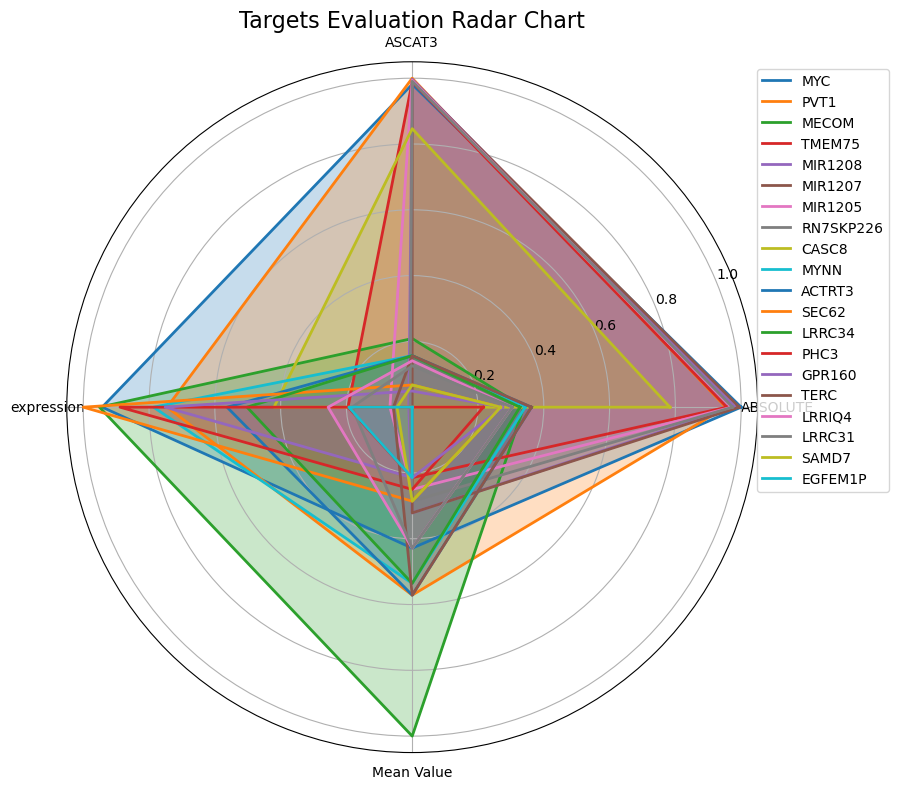

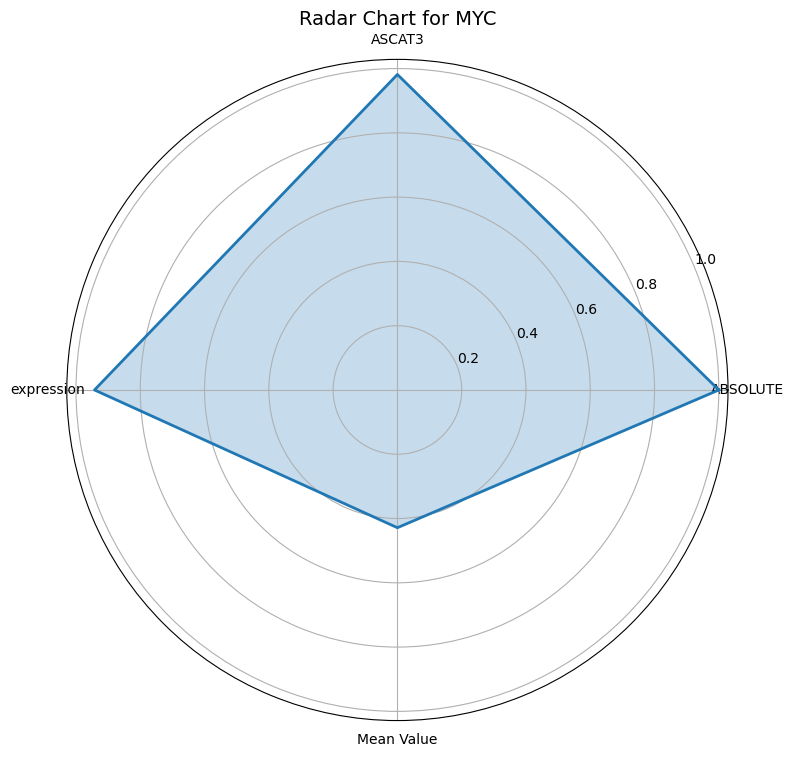

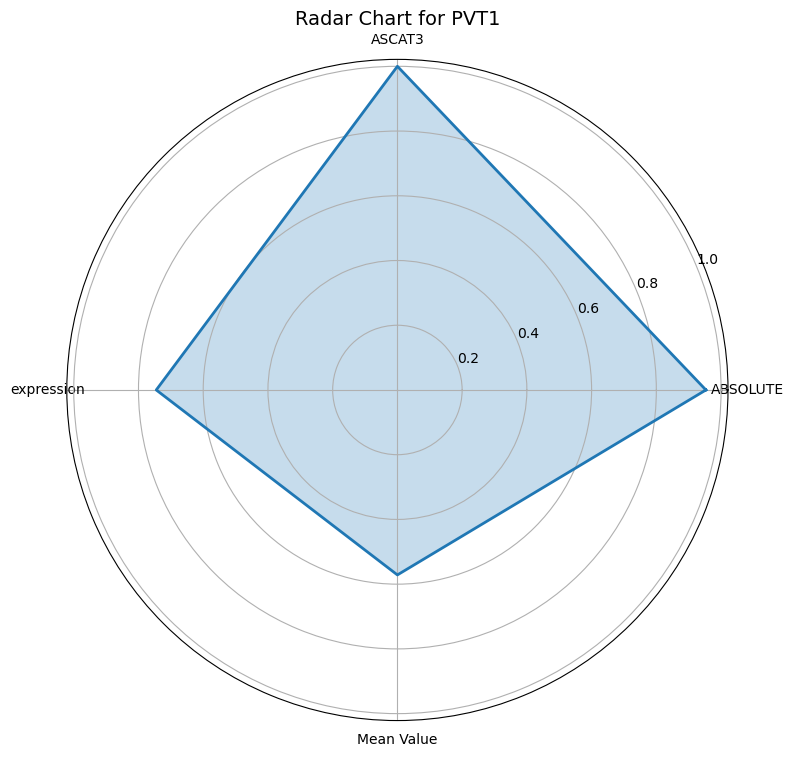

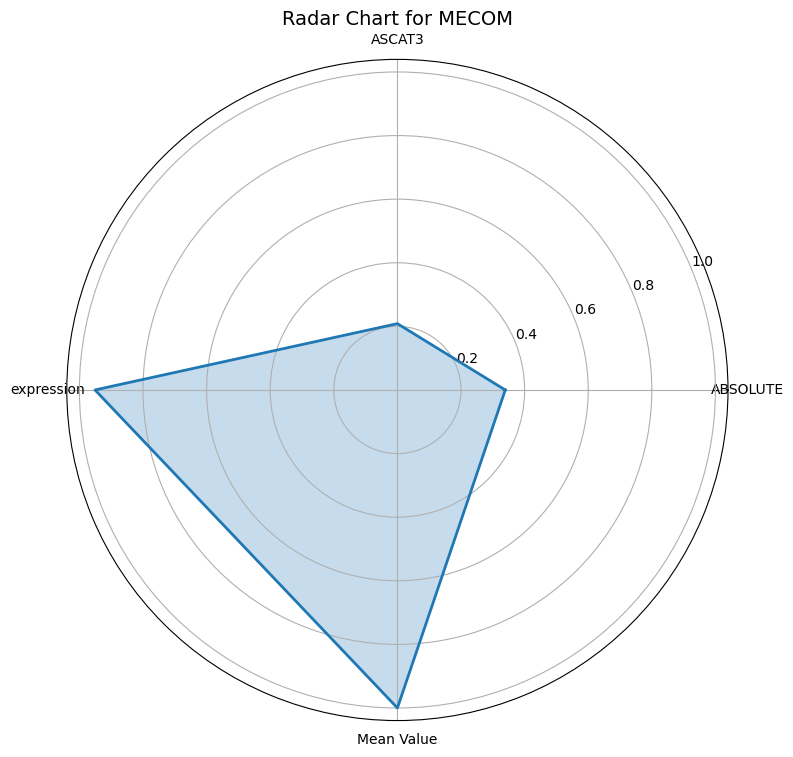

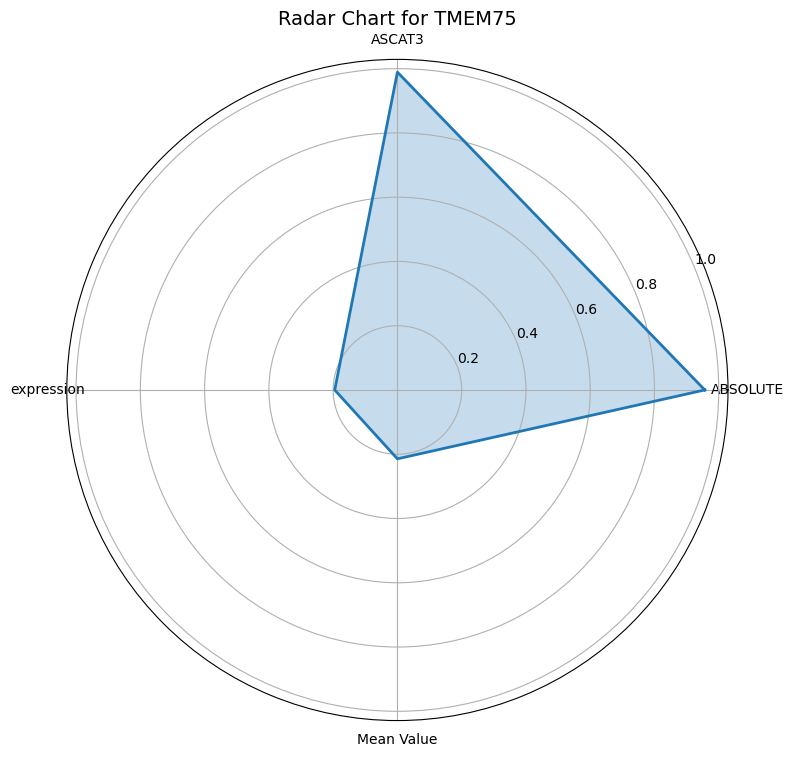

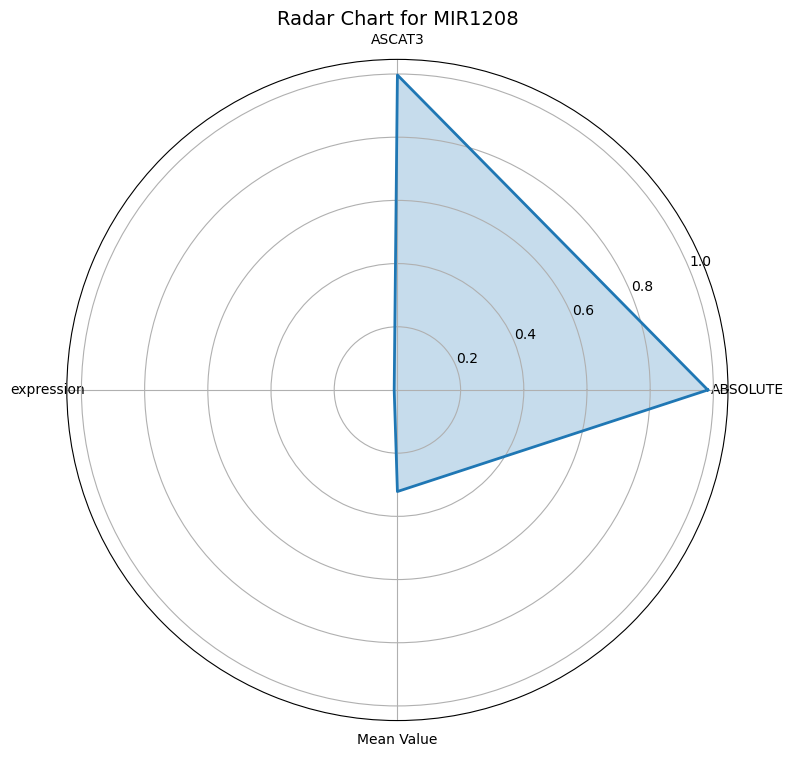

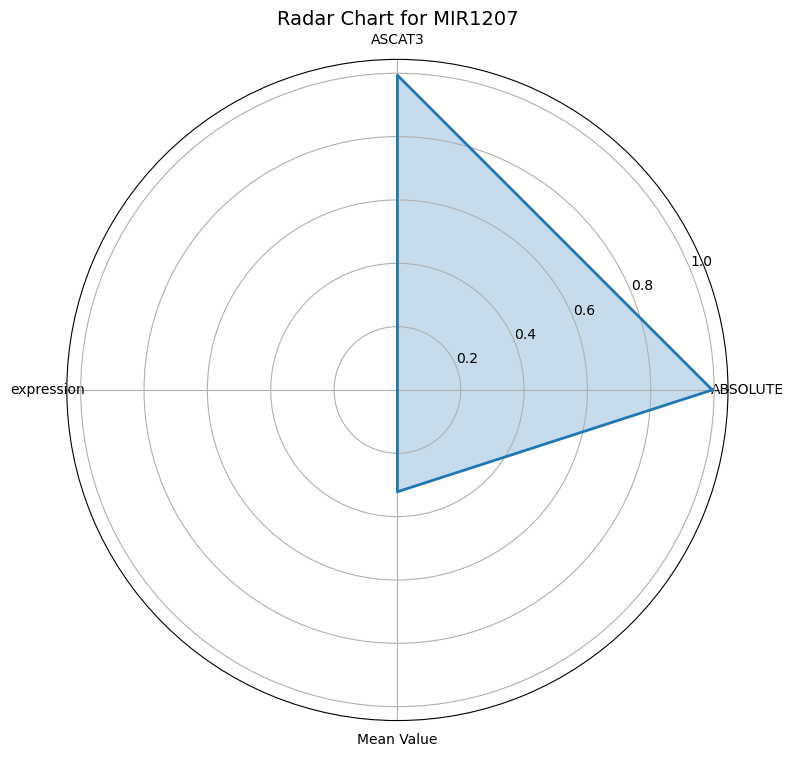

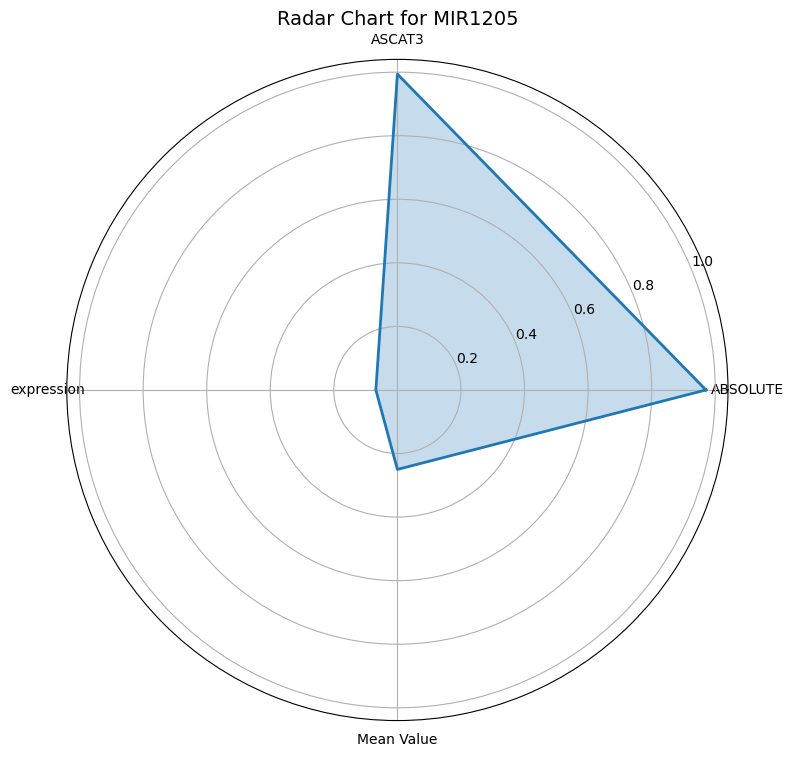

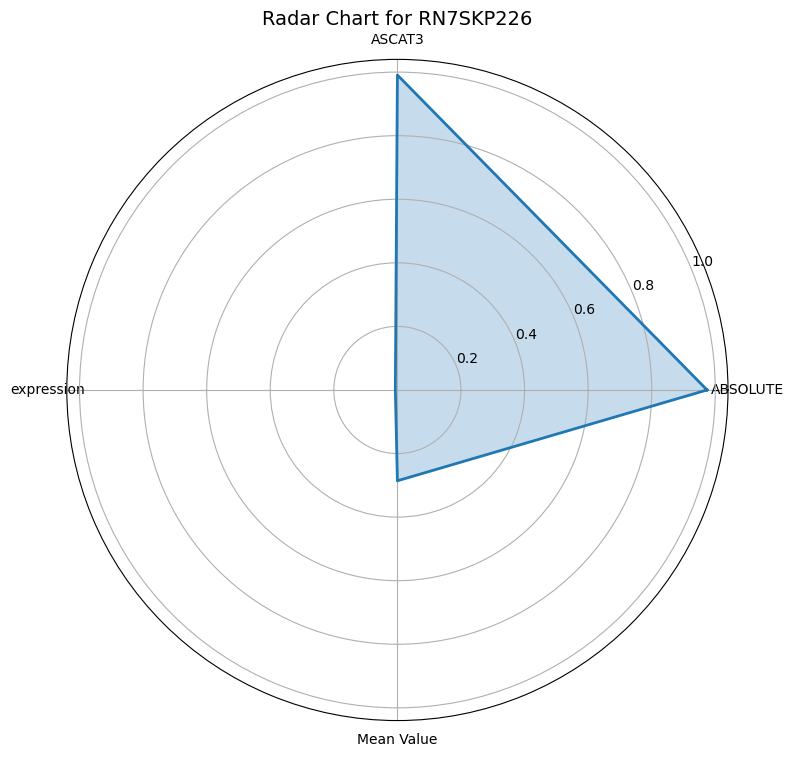

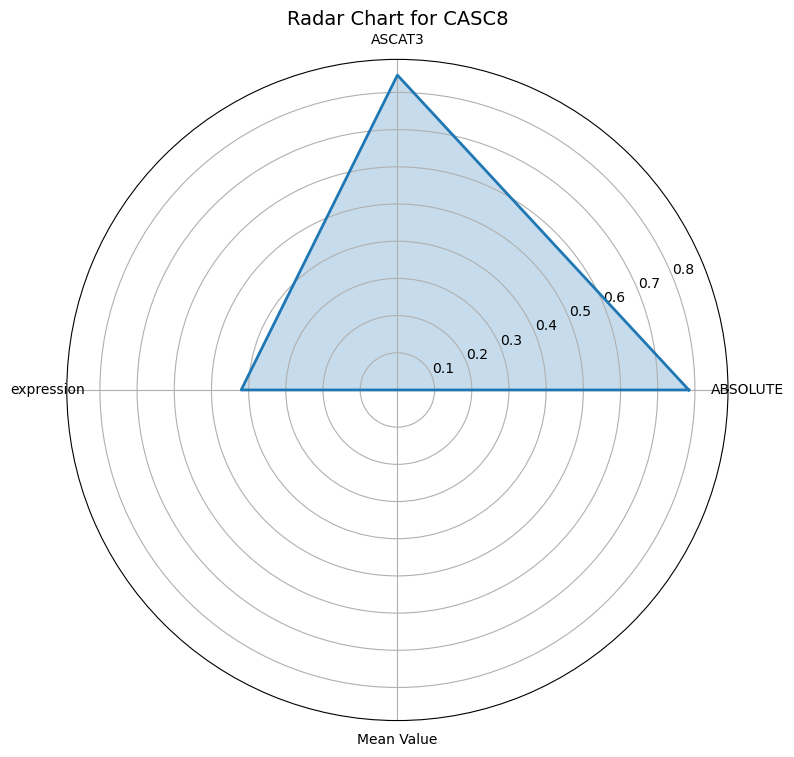

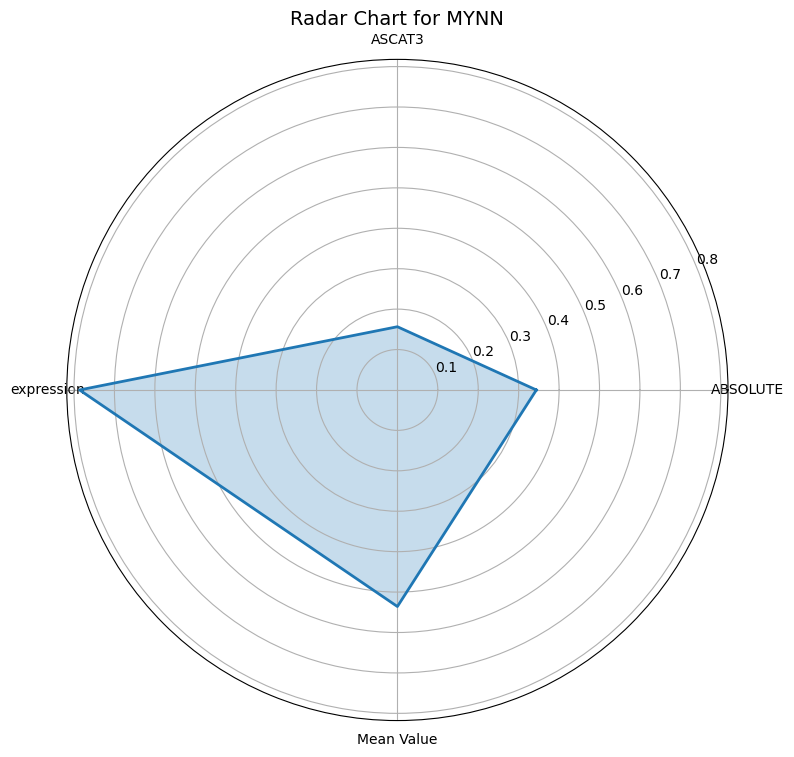

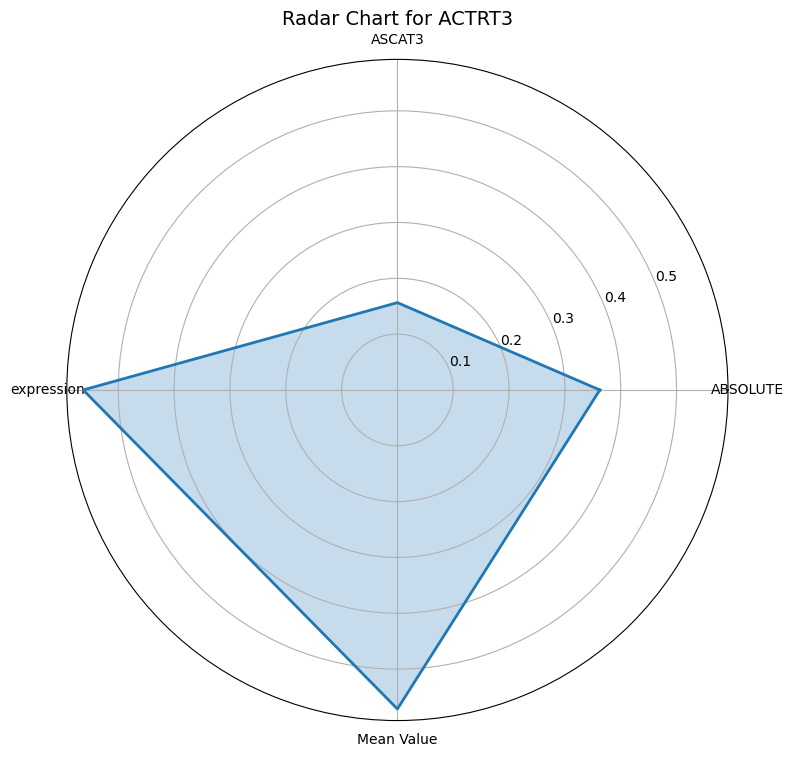

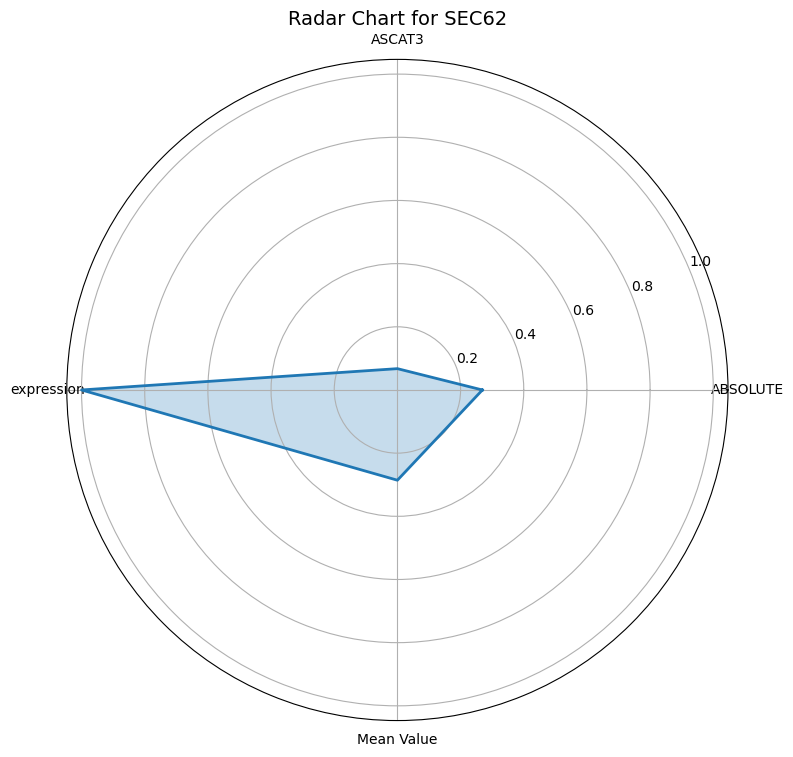

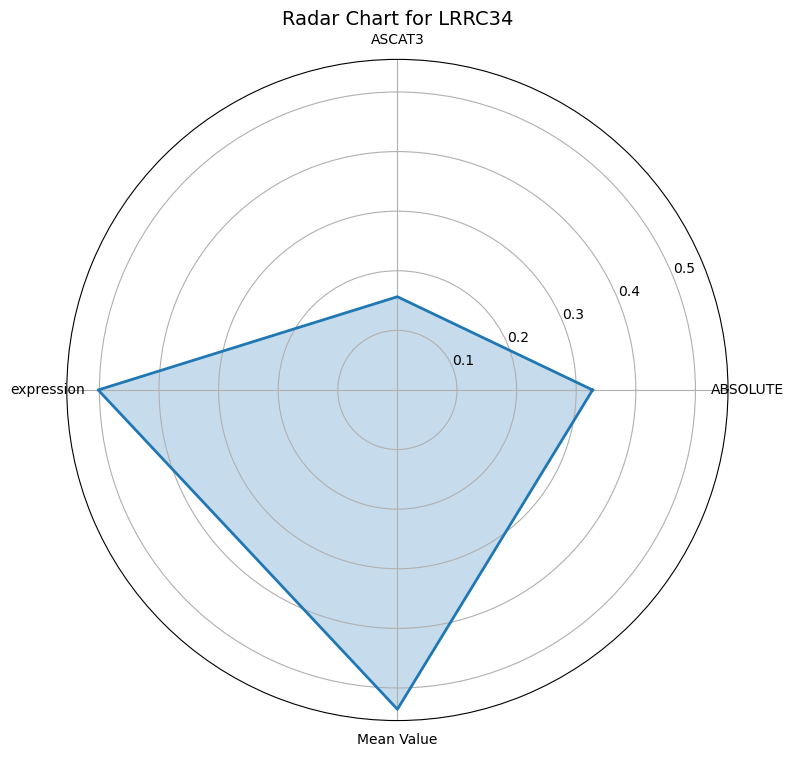

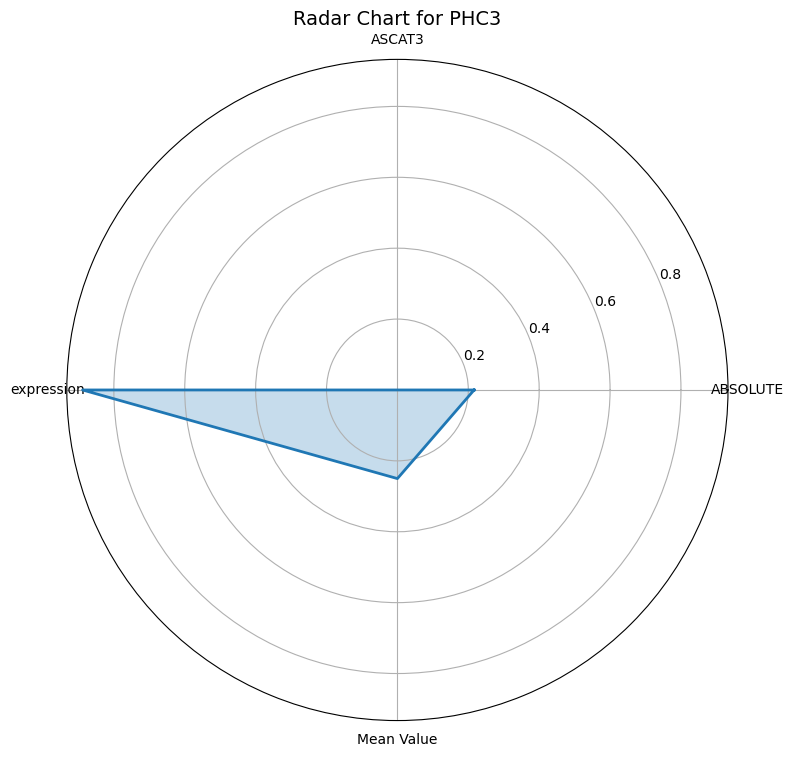

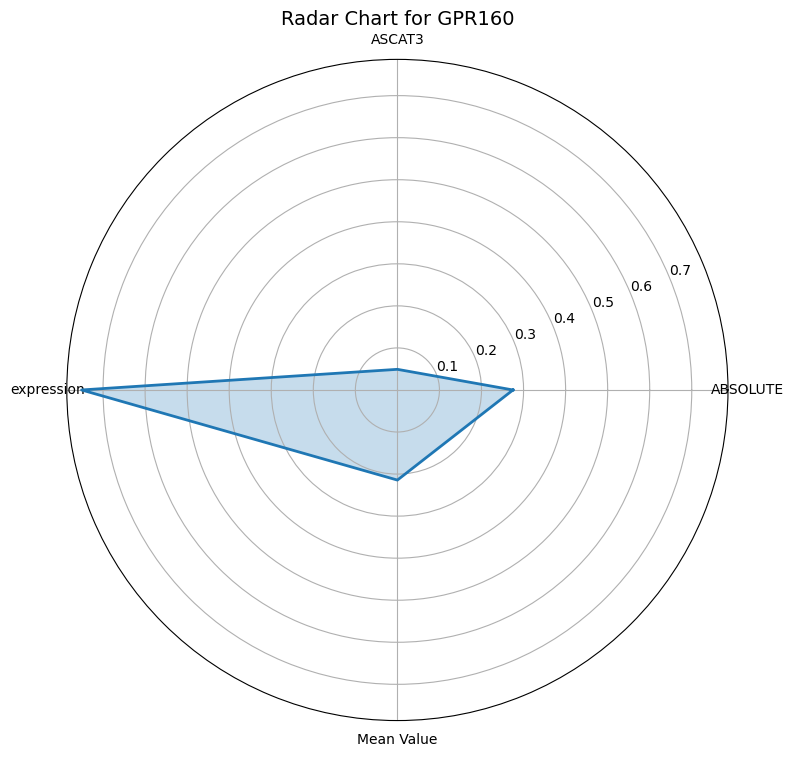

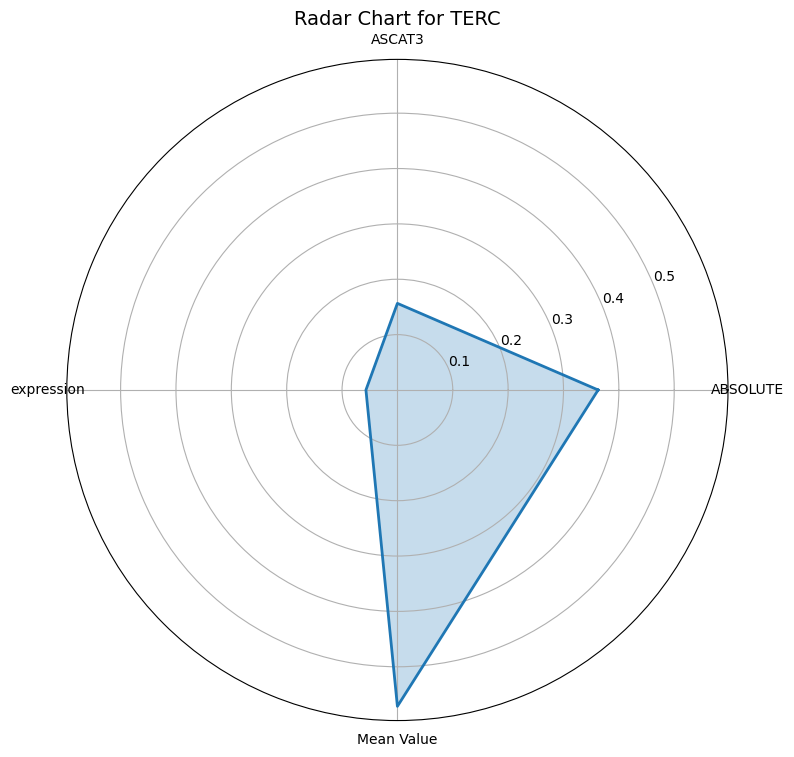

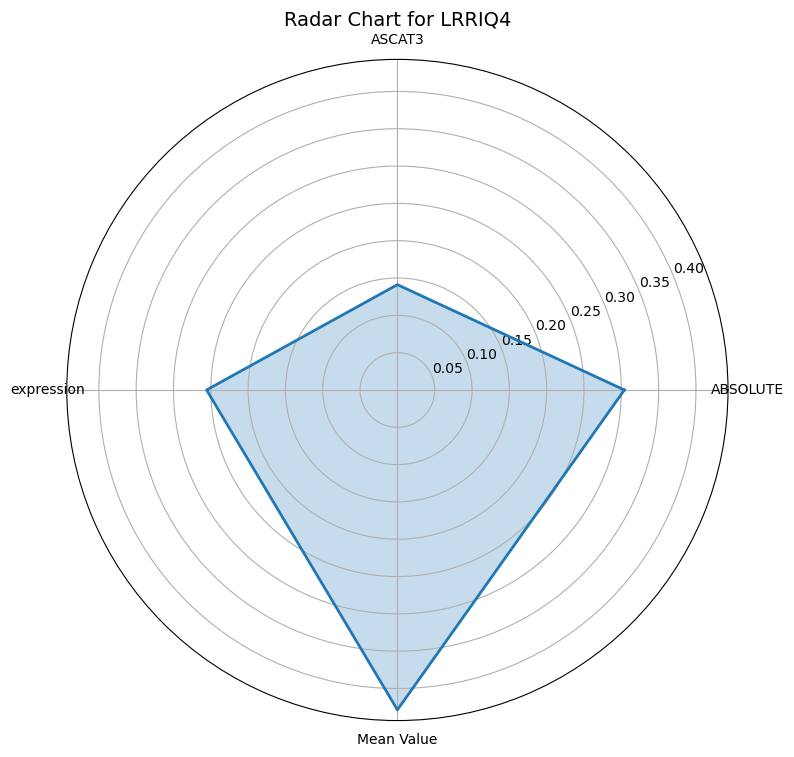

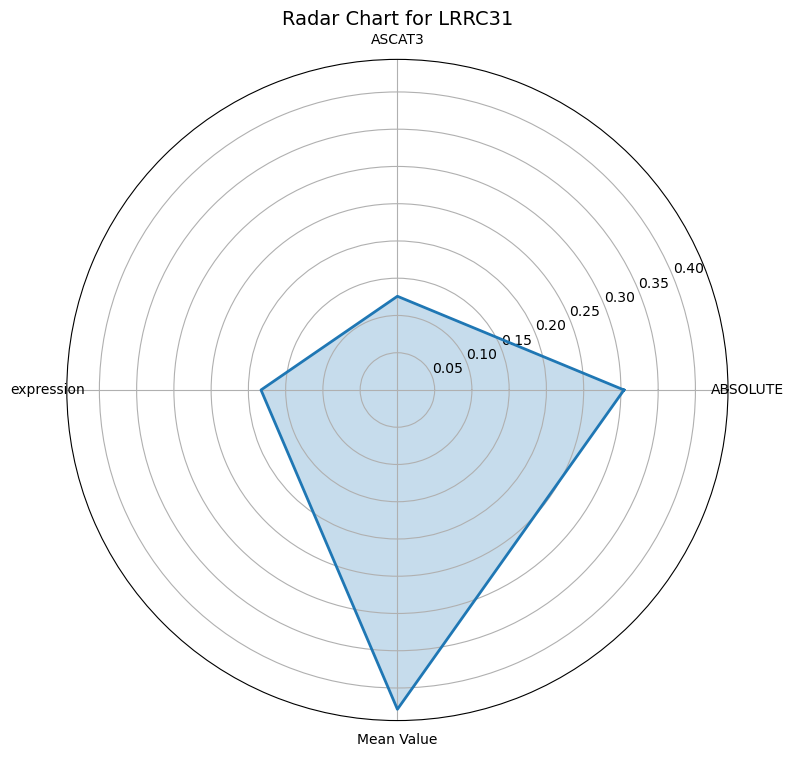

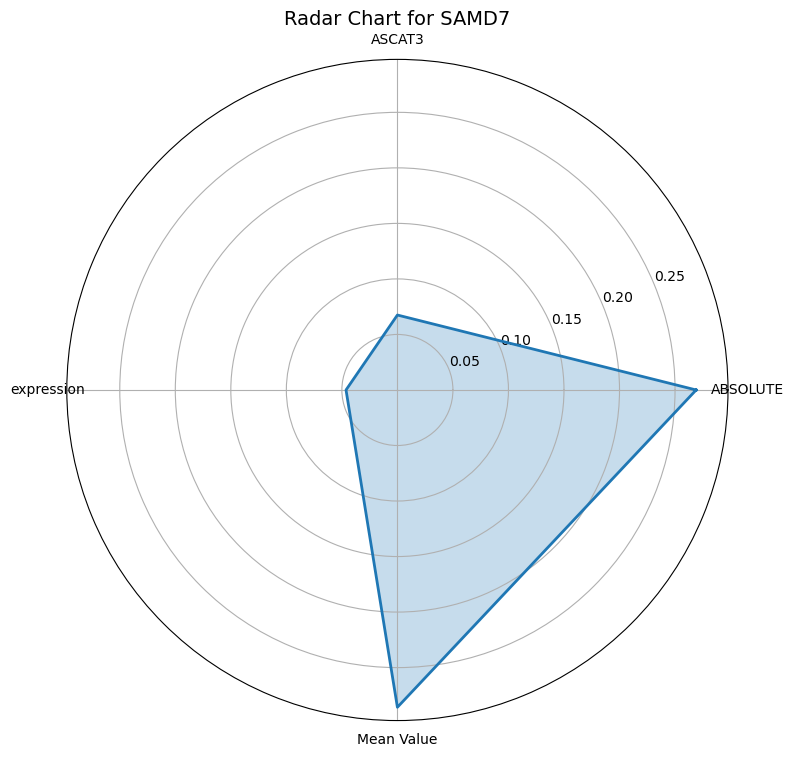

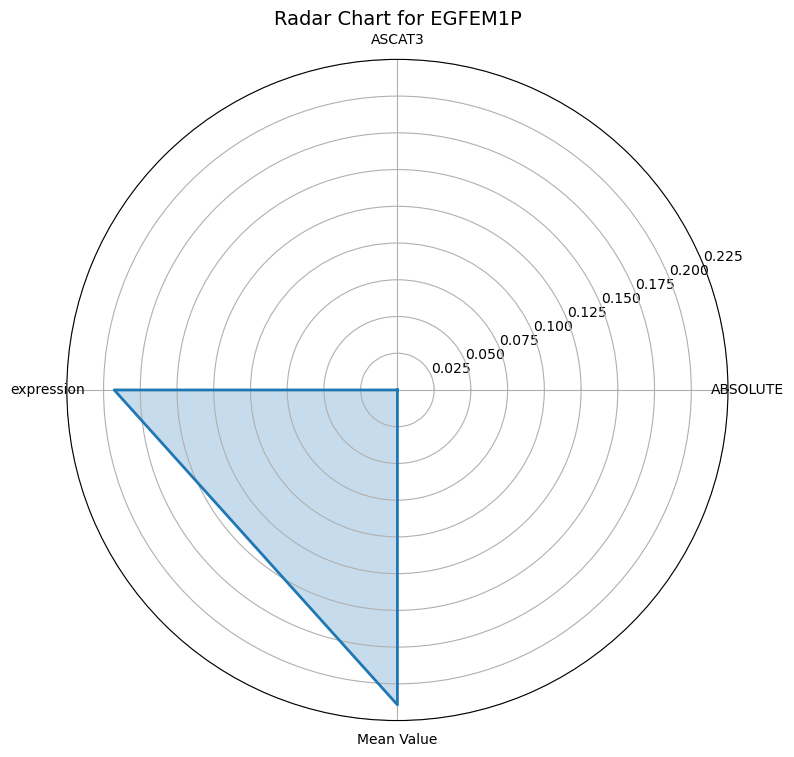

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import MinMaxScaler

# 采用 MinMaxScaler 将数据缩放到 [0, 1]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(result_df[['ABSOLUTE', 'ASCAT3', 'expression', 'Mean Value']])

# 创建新的DataFrame存储标准化后的数据
normalized_df = pd.DataFrame(normalized_data, columns=['ABSOLUTE', 'ASCAT3', 'expression', 'Mean Value'])
normalized_df['Gene'] = result_df['Gene']  # 假设 result_df 有 'Gene' 列

# 计算综合得分
weights = np.array([0.25, 0.25, 0.25, 0.25])  # 四个指标的权重
normalized_df['Score'] = (normalized_df[['ABSOLUTE', 'ASCAT3', 'expression', 'Mean Value']].values * weights).sum(axis=1)

# 根据得分排序
normalized_df = normalized_df.sort_values(by='Score', ascending=False)

# 输出结果
print(normalized_df[['Gene', 'Score']])

# 绘制雷达图
def plot_radar(data):
    categories = list(data.columns[0:4])  # 取出指标列
    N = len(categories)

    # 设置角度
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # 闭合图形

    # 创建雷达图
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

    # 为每个基因绘制雷达图
    for i in range(data.shape[0]):
        values = data.iloc[i][categories].values.flatten().tolist()
        values += values[:1]  # 闭合图形
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=data.iloc[i]['Gene'])
        ax.fill(angles, values, alpha=0.25)  # 填充颜色

    # 设置极轴标签
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title('Targets Evaluation Radar Chart', fontsize=16)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))  # 在右上角放置图例

    plt.tight_layout()
    plt.show()

# 绘制综合雷达图
plot_radar(normalized_df)

# 绘制每个基因单独的雷达图
def plot_individual_radars(data):
    categories = list(data.columns[0:4])  # 取出指标列
    N = len(categories)

    for i in range(data.shape[0]):
        gene = data.iloc[i]['Gene']
        values = data.iloc[i][categories].values.flatten().tolist()
        values += values[:1]  # 闭合图形
        
        # 设置角度
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]  # 闭合图形
        
        # 创建单独的雷达图
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=gene)
        ax.fill(angles, values, alpha=0.25)  # 填充颜色
        
        # 设置极轴标签
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        ax.set_title(f'Radar Chart for {gene}', fontsize=14)
        
        plt.tight_layout()
        plt.show()

# 绘制每个基因单独的雷达图
plot_individual_radars(normalized_df)


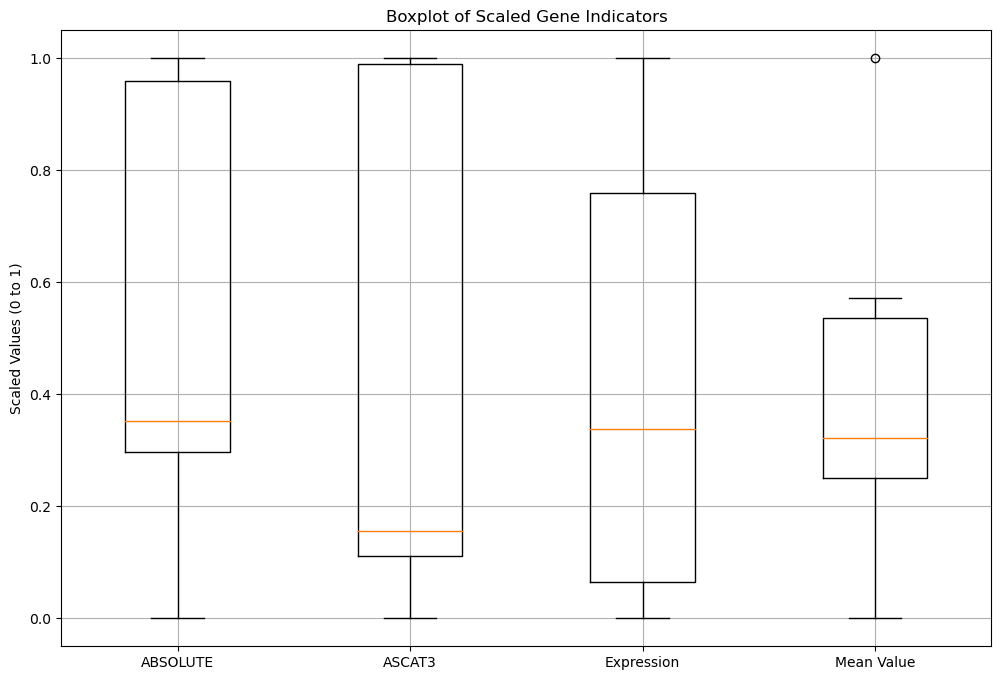

    ABSOLUTE    ASCAT3  expression  Mean value
0   0.339181  0.208589    0.950893    1.000000
1   0.953216  1.000000    0.745109    0.571429
2   0.362573  0.156442    0.562881    0.571429
3   0.362573  0.156442    0.056843    0.571429
4   0.327485  0.156442    0.502068    0.535714
5   0.343738  0.156442    0.786328    0.535714
6   0.304094  0.141104    0.255681    0.428571
7   1.000000  0.981595    0.942484    0.428571
8   0.304094  0.125767    0.183072    0.428571
9   0.982456  0.996933    0.010221    0.321429
10  0.994152  0.993865    0.000000    0.321429
11  0.269006  0.067485    0.046272    0.285714
12  0.269006  0.067485    1.000000    0.285714
13  0.974166  0.990798    0.006511    0.285714
14  0.216374  0.000000    0.888272    0.250000
15  0.970760  0.993865    0.067779    0.250000
16  0.274854  0.049080    0.751070    0.214286
17  0.956591  0.989120    0.195089    0.214286
18  0.000000  0.000000    0.192724    0.214286
19  0.783626  0.846626    0.420097    0.000000


In [ ]:
data = result_df

df = pd.DataFrame(data)

# 使用MinMaxScaler进行数据缩放到[0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['ABSOLUTE', 'ASCAT3', 'expression', 'Mean value']])

# 创建新的DataFrame以保存缩放后的数据
scaled_df = pd.DataFrame(scaled_data, columns=['ABSOLUTE', 'ASCAT3', 'expression', 'Mean value'])

# 绘制缩放后的箱型图
plt.figure(figsize=(12, 8))
plt.boxplot([scaled_df['ABSOLUTE'], scaled_df['ASCAT3'], scaled_df['expression'], scaled_df['Mean value']],
            labels=['ABSOLUTE', 'ASCAT3', 'Expression', 'Mean Value'])
plt.title('Boxplot of Scaled Gene Indicators')
plt.ylabel('Scaled Values (0 to 1)')
plt.grid(True)
plt.show()

# 输出缩放后的数据
print(scaled_df)

In [29]:
import pandas as pd

# 输入数据（同前）
data = result_df

df = pd.DataFrame(data)

# 计算Q1并过滤数据
for col in ['ABSOLUTE', 'ASCAT3', 'expression', 'Mean value']:
    Q1 = df[col].quantile(0.25)
    df = df[df[col] >= Q1]

print(df)


     Gene  ABSOLUTE    ASCAT3  expression  Mean value
0   MECOM  4.388193  4.994595   12.712127    1.198618
1    PVT1  4.576029  5.459459    9.961079    1.177893
2  ACTRT3  4.395349  4.963964    7.524944    1.177893
3    TERC  4.395349  4.963964    0.759914    1.177893
4  LRRC34  4.384615  4.963964    6.711959    1.176166
5    MYNN  4.389587  4.963964   10.512125    1.176166
7     MYC  4.590340  5.448649   12.599711    1.170984
